In [1]:
import tweepy
import json
from time import sleep
import pickle
import re
from os import listdir
from os.path import isfile, join
import sys
import math
%matplotlib inline
import matplotlib.pyplot as plt

# configuration

In [5]:
config = {}
path = 'C:\\Users\\chenwang\\Documents\\courses\\FA16\CS597\\twitterMining\\'
initialSet_path = 'C:\\Users\\chenwang\\Documents\\courses\\FA16\\CS597\\twitterMining\\InitialSet\\Football\\location\\'

config['KEYS'] = {'consumer_key': ['mVJcyNN5qFyk7GdBJvENVc329', 'anqjETSjwaDqA9LBt0MGwub60','vDnzvZFFwXFgI2ftQxYWV2XZo',
                                  'sAkNaJxJWgPilhidaNJ48kmCo','tO2Bzbkexyf57LSF6aJwACXfs'],
                  'consumer_secret': ['DbXUXB7EN77HmzQahobHeTPSWgcNI9t8kKzDoe5twfTORnjXxf',\
                                       'AGTAiJhOrb2gPSbW1F5Rclu0Ns7pTZthPhJ3i7ySFNWwdheqim',\
                                     '5HxLPob3kGqgauc5HuNszFw0uoLjsK3JHD0IqUNEVbNAIVdRKQ',\
                                      'dPcVmoYaEGhsWC5djrEFsjfNdO8DmFecmSnBRjL63y0Sg9pCtl',
                                     'OIEIE1Pu01eTieDffG13kJM78spAPHZtKk2IZ1yGkU0eoKvVxn'],
                  'access_token': ['707770026573561856-Vfqm0iXrsBvFL2prQMQ2Gzu9eawWYIj',\
                                    '707770026573561856-diXgIsR0UCYM3CHYCUoU38hcp8Qk8Pj',\
                                  '707770026573561856-9BcLFzjLrkVdxeG0Z3dmqYhsCDqUQ2t',\
                                  '707770026573561856-Sua2gUtlWTxTik70a0dUba0SvayeQgU',\
                                  '707770026573561856-Oi1nNb4Ih0SJyizIwToY3PhjLymGkcl'],
                  'access_token_secret': ['HSMqS4YkDBcB6mm9JL3vd6VeKlkKmNdMxmJ0inJQwNhXS',\
                                           'GnqrY0AoeOuK7cgaF2yRBmcJGcc814bBIONMREN8gU7xu',\
                                         'e2OfQnQGnweLygFxJRFCUa9PZhOZXyCcaEipMpnlmABqj',\
                                         'Stj2TQtwsrTQFkdronpZDUyrl9g3slZjEMxgIYznbmSzy',\
                                         'Cp3d4xKdTfPyJq6y7uLeRLv77kTjZmEIpGYtiWrrqvK6i']
                 }
''
# later add {if it's not exist then write, otherwise skip}
with open(path + "CONFIG_PATH.pickle", 'wb+') as f:
        pickle.dump(config, f)

In [6]:
consumer_key = config['KEYS']['consumer_key']    # list
consumer_secret = config['KEYS']['consumer_secret']
access_token = config['KEYS']['access_token']
access_token_secret = config['KEYS']['access_token_secret']

# use to collect location

auth = tweepy.OAuthHandler(consumer_key[2], consumer_secret[2])
auth.set_access_token(access_token[2], access_token_secret[2])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

auth = tweepy.OAuthHandler(consumer_key[0], consumer_secret[0])
auth.set_access_token(access_token[0], access_token_secret[0])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

auth = tweepy.OAuthHandler(consumer_key[1], consumer_secret[1])
auth.set_access_token(access_token[1], access_token_secret[1])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

auth = tweepy.OAuthHandler(consumer_key[3], consumer_secret[3])
auth.set_access_token(access_token[3], access_token_secret[3])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

auth = tweepy.OAuthHandler(consumer_key[4], consumer_secret[4])
auth.set_access_token(access_token[4], access_token_secret[4])
api = tweepy.API(auth, wait_on_rate_limit= True,wait_on_rate_limit_notify=True)

location_dict = {}

for c in candidate_NB[7500:7529]:
    location_dict[c[0]] = gather_location(c[0])
with open(initialSet_path + 'candidate_location_list.pickle','wb+') as f:
    pickle.dump(location_dict, f)

len(location_dict)

# test whether the ranking predictive model works

<p>seperate them into groups: baseline(twitter stream), every 300? </p>
<p>we should see there is a decline in matching accuracy in the two aspects: eg.football + chicago </p>

<p> 1. chicago </p>
<b> ratio = # user from chicago / # number of user provide their location </b>



In [2]:
# a bag of pre-defined locations that represent chicago

chicago = ['chicago','Arlington Heights', 'Aurora', 'Berwyn', 'Bolingbrook', 'Cicero','Des Plaines', 'Elgin','Evanston', 'Gary', 'Hammond',
           'Hoffman Estates', 'Joliet', 'Kenosha', 'Mount Prospect','Naperville', 'Oak Lawn', 'Oak Park', 'Orland Park',
           'Palatine', 'Schaumburg','Skokie','Tinley Park','Waukegan','Wheaton'] #,', IL','Illinois']

In [13]:
def print_ratio(candidate_list,location_list, area, interval,title,verbose=False):
    
    ratio = []
    
    for i in range(math.floor(len(candidate_list)/interval)):
        if verbose == True:
            print('bin:',interval*(i), '~', interval*(i+1))
        
        target_count = 0
        general_count = 0
        no_count = 0
        
        for cand in candidate_list[interval*(i): interval*(i+1)]:
            if location_list[cand[0]] != 'NaN' and location_list[cand[0]] != None:
                general_count += 1
                #print('g',general_count,loc)
                flag = False
                for a in area:
                    if location_list[cand[0]].lower().find(a.lower()) != -1: 
                        # matches one of the place that stands for chicago
                        flag = True
            
                if flag == True:
                    target_count += 1
                    #print('t',target_count,loc)
            else:
                no_count += 1                
        
        if verbose == True:
            print("% of people provide location : ", general_count/(interval)*100, '%')
        
        if general_count !=0:
            if verbose == True:
                print("% of people from chicago who provided location: ", target_count/general_count*100, '%\n')
            ratio.append(target_count / general_count)
        else:
            if verbose == True:
                print("invalid bin\n")
            ratio.append('NaN')
            
    
    x = range(len(ratio))
    y = ratio

    fig, axes = plt.subplots(figsize=(10,10))

    axes.bar(x,y)
    axes.set_xlabel('ranked group with an interval of ' + str(interval), fontsize = 20)
    axes.set_ylabel('percentage of user from chicago',fontsize = 20)
    axes.set_title(title,fontsize = 30)

    plt.show()  
            

    return ratio

In [7]:
with open(initialSet_path + 'candidate_location_list.pickle','rb') as f:
    location_dict = pickle.load(f)

# test cosine similarity rank (weighted)

In [30]:
with open(initialSet_path + 'weighted_sim_ranked_100.pickle','rb') as f:
    candidate_sim = pickle.load(f)
# print(len(candidate_sim))

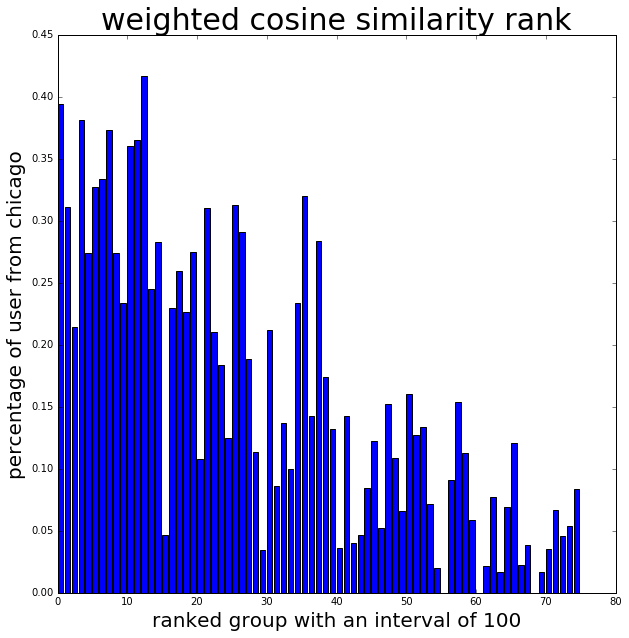

In [31]:
ratio = print_ratio(candidate_sim, location_dict, chicago, interval = 100, title = 'weighted cosine similarity rank',verbose = False)

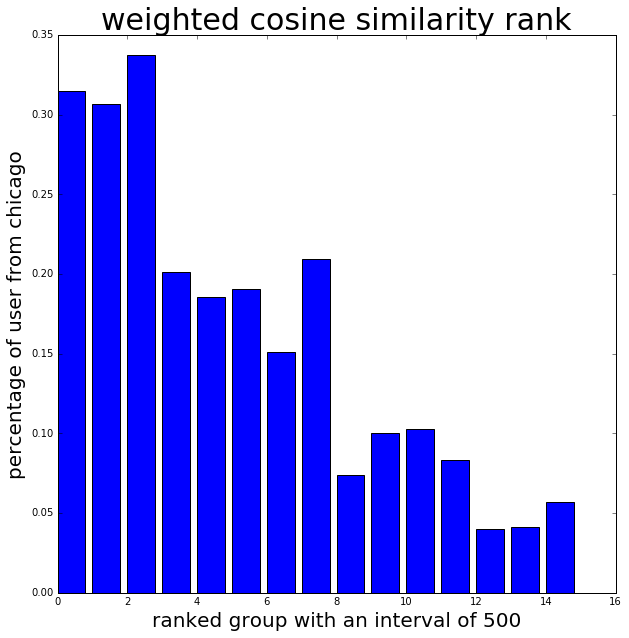

In [32]:
ratio = print_ratio(candidate_sim, location_dict, chicago, interval = 500, title = 'weighted cosine similarity rank',verbose = False)

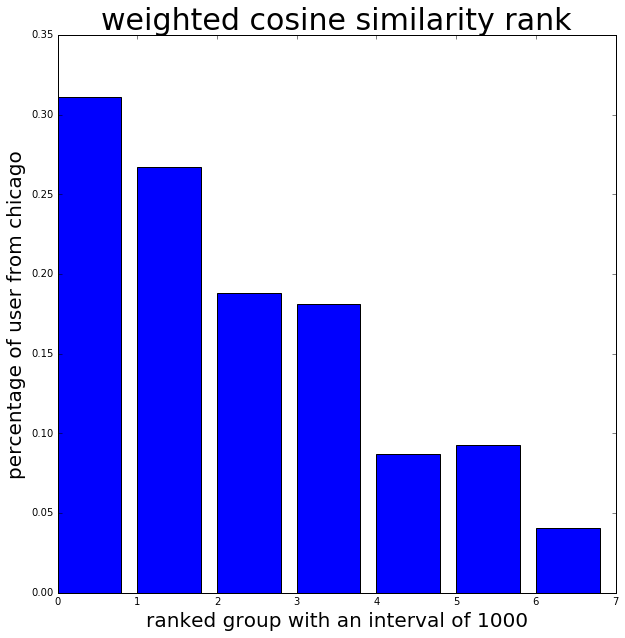

In [33]:
ratio = print_ratio(candidate_sim, location_dict, chicago, interval = 1000, title = 'weighted cosine similarity rank',verbose = False)

# test unweighted cosine similarity

In [35]:
with open(initialSet_path + 'unweighted_sim_ranked_100.pickle','rb') as f:
    u_candidate_sim = pickle.load(f)

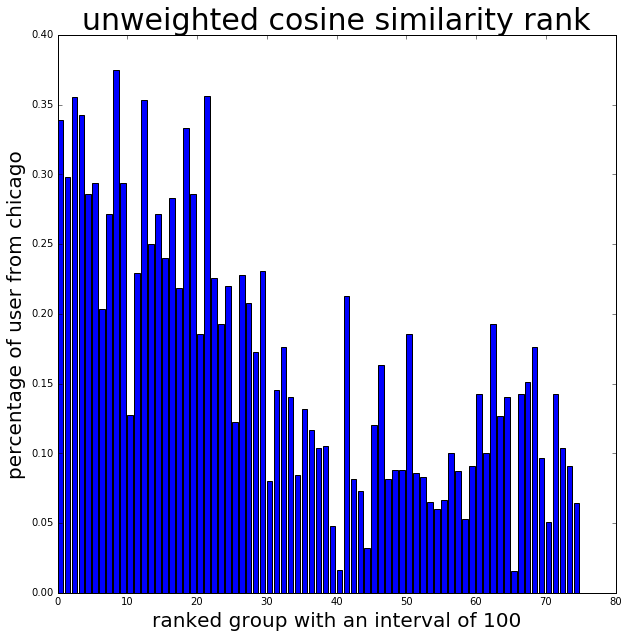

In [36]:
ratio = print_ratio(u_candidate_sim, location_dict, chicago, interval = 100, title = 'unweighted cosine similarity rank',verbose = False)

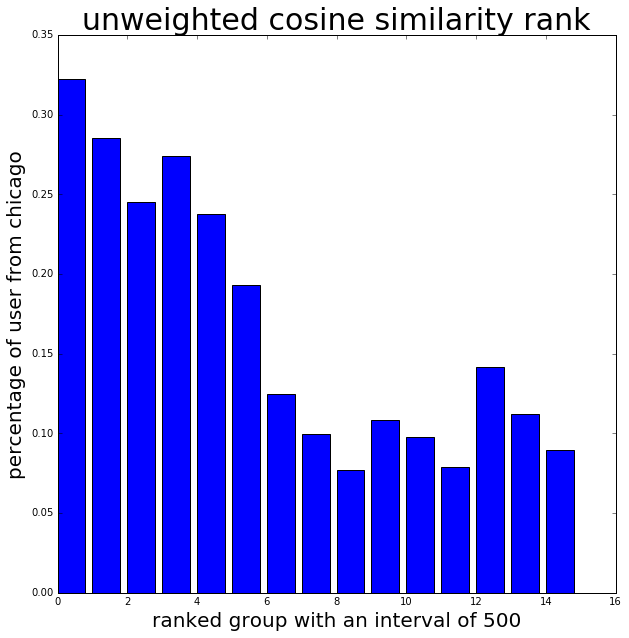

In [37]:
ratio = print_ratio(u_candidate_sim, location_dict, chicago, interval = 500, title = 'unweighted cosine similarity rank',verbose = False)

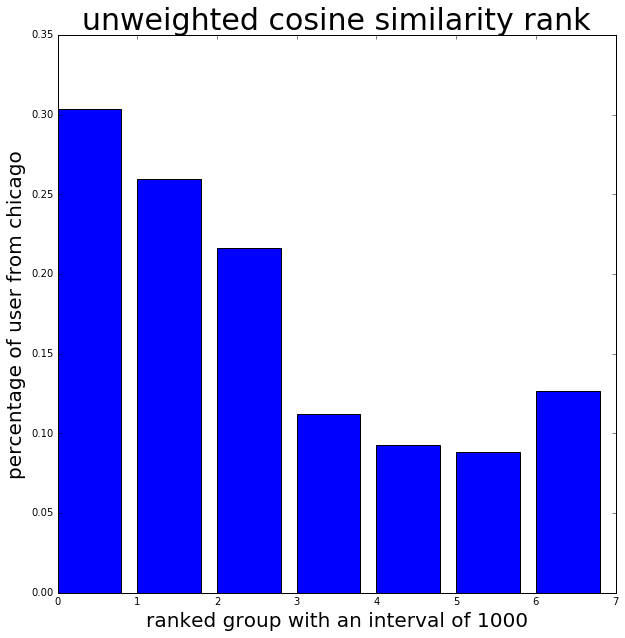

In [38]:
ratio = print_ratio(u_candidate_sim, location_dict, chicago, interval = 1000, title = 'unweighted cosine similarity rank',verbose = False)

# test NB ranking 

In [18]:
with open(initialSet_path + 'NB_ranked_100.pickle','rb') as f:
    candidate_NB = pickle.load(f)
print(len(candidate_NB))

7529


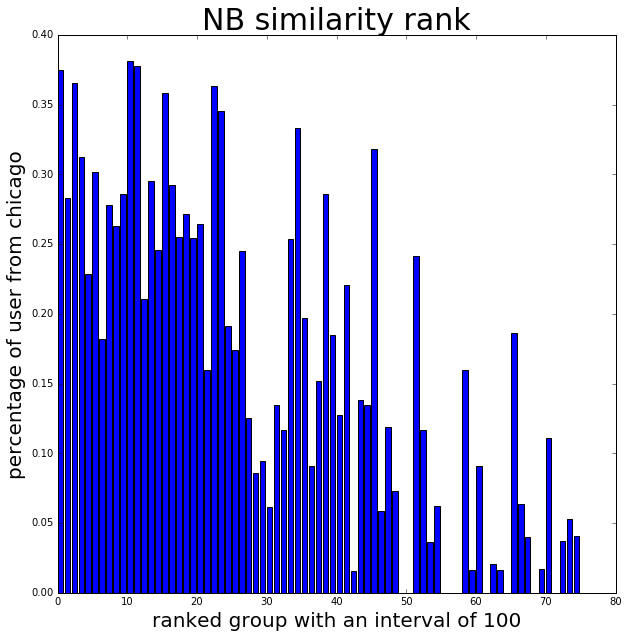

In [21]:
ratio = print_ratio(candidate_NB, location_dict, chicago, interval = 100, title = 'NB similarity rank',verbose = False)

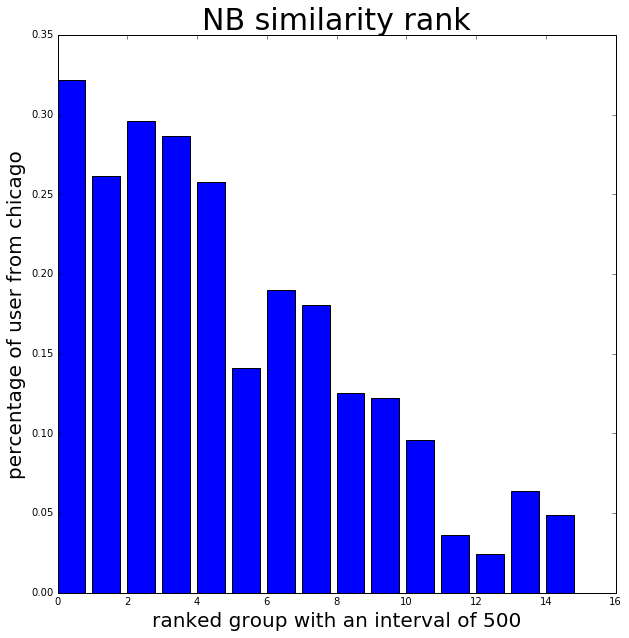

In [24]:
ratio = print_ratio(candidate_NB, location_dict, chicago, interval = 500, title = 'NB similarity rank',verbose = False)

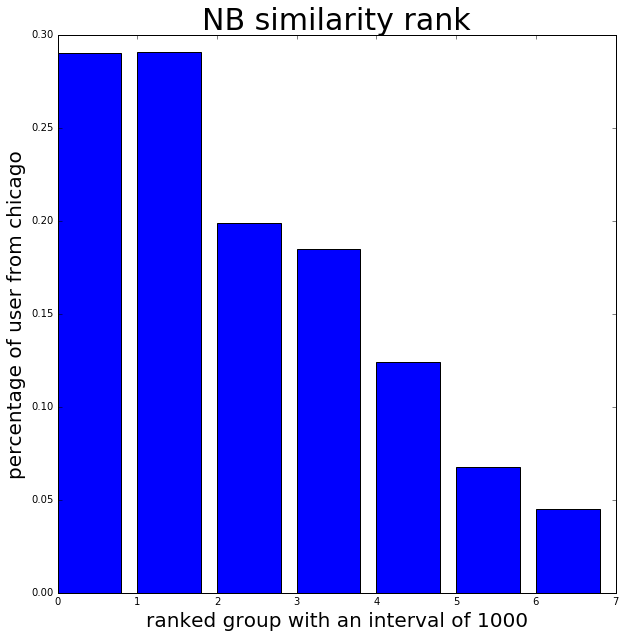

In [25]:
ratio = print_ratio(candidate_NB, location_dict, chicago, interval = 1000, title = 'NB similarity rank',verbose = False)